<h1>Business Understanding</h1>
<h2>The CIFAR-10 Dataset</h2>
<h3>Overview</h3>
<p>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 
</p>

<p>
    <ul>
        <li>Airplane</li>
        <li>Automobile</li>
        <li>Bird</li>
        <li>Cat</li>
        <li>Deer</li>
        <li>Dog</li>
        <li>Frog</li>
        <li>Horse</li>
        <li>Ship</li>
        <li>Truck</li>
    </ul>
</p>

<p>The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.</p>

<h3>Purpose of the Dataset</h3>
<p>To train machine learning and computer vision algorithms, as these algorithms learn to recognize objects in images by example.</p>
<h3>Why was the data collected in the first place?</h3>
<p>The data was collected by the Canadian Institute for Advanced Research (CIFAR). It is a labeled subset of the 80 million tiny images dataset. Students were paid to label those images. This dataset was built primarily for machine learning reasearch.</p>
<h3>Prediction Task</h3>
<p>The task is to be able to accurately classify the images by labels. There are 10 classes and labels in this dataset. As this dataset was primarily built for machine learning research, educational institutions and researchers would be most interested in this dataset to train and test their algorithms. The importance of this dataset lies in its versatility and simplicity; it is a clean dataset with a clear prediction task that can be used to train algorithms.</p>

<h3>Business Case: Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties</h3>
<p>A cloud image service like imgur could utilize an image classifer to classify every image that gets uploaded to their servers. Image classification could be important to exclude certain images from getting uploaded, as manually surfing through all uploaded images is inefficient and impractical. So it would function as a filter. It could also serve to classify the content of those images and assign a label for each. While this is a relatively small subset of images with a small number of classes (10), it would serve to test the performance of different prediction algorithms. Having said that, the prediction algorithm would need to be very accurate to be useful for those uses. A margin of 97% accuracy is selected in this case. Identifying a car as a frog is unacceptable, as an example.</p>

<h2>Reading in The Images</h2>

In [1]:
# Loading (unpickling) the data for later processing
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dicts = pickle.load(fo, encoding='bytes')
        images = dicts[b'data']
        labels = dicts[b'labels']
        imageArray = np.array(images)
        labelArray = np.array(labels)
    return imageArray, labelArray

In [2]:
# These are the data and class variables (targets)
first_batch_images, first_batch_labels = unpickle('cifar-10-batches-py\data_batch_1')
second_batch_images, second_batch_labels = unpickle('cifar-10-batches-py\data_batch_2')
third_batch_images, third_batch_labels = unpickle('cifar-10-batches-py\data_batch_3')
fourth_batch_images, fourth_batch_labels = unpickle('cifar-10-batches-py\data_batch_4')
fifth_batch_images, fifth_batch_labels = unpickle('cifar-10-batches-py\data_batch_5')

images = np.vstack((first_batch_images, second_batch_images, third_batch_images, fourth_batch_images, fifth_batch_images))
image_labels = np.vstack((first_batch_labels, second_batch_labels, third_batch_labels, fourth_batch_labels, fifth_batch_labels))
images_array = np.hstack((images, image_labels.reshape((50000, 1))))

# Here we randomly shuffle the rows of the image batch arrays
np.random.shuffle(images_array)

# Then we slice the array back into the features and target arrays
images, image_labels = images_array[:, :-1], images_array[:, -1]

<h2>Processing the images: Recoloring and Linearization</h2>

<p>
First, we initialize numpy arrays to process the five batches.
The images are 32x32 each, and each row in the original arrays represents the image.
First comes the 32x32 = 1024 red channel followed by 1024 entries of green and then 1024 entries of blue, making the length of each row 3072.
I convert them to grayscale and map them into a new numpy array for later processing.
</p>

In [3]:
image_count = images.shape[0]
proc_images = np.zeros((image_count, 1024))

for image_idx in range(image_count):
    for i in range(1024):
        proc_images[image_idx, i] = 0.3*images[image_idx, i] +  0.59*images[image_idx, i + 1024] + 0.11*images[image_idx, i + 2048]

In [4]:
n_samples, n_features = proc_images.shape

# As given by the dataset
h, w = 32, 32

labels = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
n_classes = len(labels)

In [5]:
print('My dataset contains', proc_images.shape[0],'images')

My dataset contains 50000 images


<h2>Description of the final images dataset</h2>
<p>The images have been read in, recolored and linearized into row vectors. All 50,000 images in the 5 training batches have been processed to form my dataset. The mix of all five batches (the 50,000 images) have a balanced number of pictures corresponding to each the classes. I will only be working with 10000 images in this assignment and I assume that the random 10,000 images I procure from those batches will be relatively balanced.</p>

<h3>Class balance in the dataset</h3>

<p>The code below shows the number of instances of each of the classes in the dataset. They all have a count of 5000. The dataset is perfectly balanced.</p>

In [6]:
for i in range(n_classes):
    print('The number of instances from the ', i, 'class is: ', len(image_labels[image_labels == i]))

The number of instances from the  0 class is:  5000
The number of instances from the  1 class is:  5000
The number of instances from the  2 class is:  5000
The number of instances from the  3 class is:  5000
The number of instances from the  4 class is:  5000
The number of instances from the  5 class is:  5000
The number of instances from the  6 class is:  5000
The number of instances from the  7 class is:  5000
The number of instances from the  8 class is:  5000
The number of instances from the  9 class is:  5000


In [7]:
# A function to show a sample of the image data
def plot_gallery(images, titles, h, w, n_row=3, n_col=11):
    plt.figure(figsize = (1.6 * n_col, 1.6 * n_row))
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

<h3>Image Data</h3>

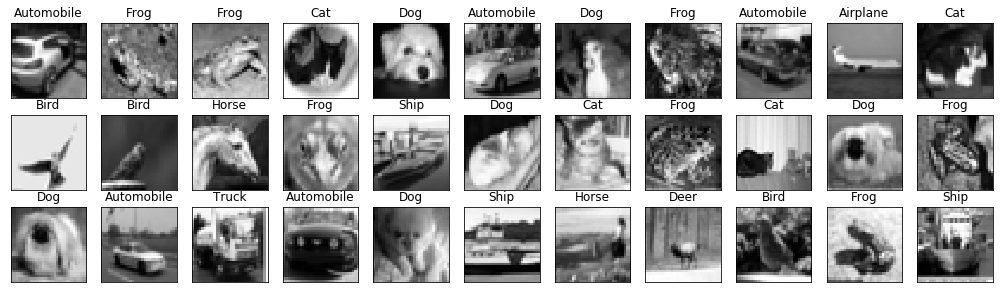

In [8]:
plot_gallery(proc_images, labels[image_labels], h, w)

<h2>Shuffling and splitting the dataset</h2>

<p>Here, I will be shuffling the dataset and randomly selecting a subset of 10,000 images to be later split into a 80/20 training/testing portions. I will be manually doing this process because I don't prefer to use the sci-kit learn shuffling class at this time. I have encountered a problem that I have wrongly attributed to the sci-kit learn shuffling class, so I proceeded to manualy split the data and perform training of the images. Re-training the images using splits by the scikit-learn shuffling class now would take time that I cannot afford at the moment.</p>

In [9]:
def get_10000_images(images, image_labels):
    
    shuffled_images = np.hstack((images, image_labels.reshape((image_labels.shape[0], 1))))
    np.random.shuffle(shuffled_images)
    s_images, s_image_labels = shuffled_images[:, :-1], shuffled_images[:, -1]
    return s_images[0:10000], s_image_labels[0:10000].astype(int)

In [10]:
def pca_images(images, n):
    pca = PCA(n_components = n)
    pca.fit(images)
    X = np.zeros((images.shape[0], n))
    for i in range(images.shape[0]):
        X[i,:] = pca.transform(images[i].reshape(1, -1))
    return X

<h2>80/20 Argument</h2>
<p>I think that 80/20 portions for training and testing is reasonable for this dataset. The reason is that the images are small being sized at 32x32, which means that if classification is based on pixel data of the image, then a large number of training images is needed to account for the lack of distincitve features and smallness of the images. An 80/20 split seems like a reasonable option.</p>

<p>Even if we were to change the portions to, say, 95/5 for training and testing, I don't think it would increase the accuracy of classification much, since pure image data (pixels in this case) do not hold much weight in carrying distinctive attributes that would help in classification tasks, especially that the images are small.</p>

<p>Portions would impact accuracy, I believe, when bags of features models (like DAISY) are used to fit the regression objects.</p>

<h2>Variance of the images</h2>

In [11]:
n_components = 200
pca_f = PCA(n_components = n_components)
pca_f.fit(proc_images.copy())

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='tete9000', api_key='936qqajHBpvuiyFBHpZL')
from plotly.graph_objs import *
    
explained_var = pca_f.explained_variance_ratio_*100
cum_var_exp = np.cumsum(explained_var)
    
py.iplot({
     "data": [Bar(y=explained_var, name='individual explained variance'),
             Scatter(y=cum_var_exp, name='cumulative explained variance')
         ],
      "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
})

<p>200 components describe ~96% of the variance, so I am justified in using those 200 components to describe my images when classifying using regression.</p>

<h1>Modeling</h1>

In [13]:
import numpy as np
from scipy.special import expit
from numpy.linalg import pinv
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
import itertools
from skimage.feature import daisy
from sklearn import metrics as mt
from sklearn.decomposition import PCA

#This class defines the base methods to be used in the BinaryLogisticRegression class
class BinaryLogisticRegressionBase:

    @staticmethod
    def _sigmoid(theta):
        return expit(theta) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X))
    
    def predict_proba(self,X,add_bias=True):
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_)
    
    def predict(self,X):
        return (self.predict_proba(X) > 0.5)

In [14]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):

    def __init__(self, eta, iterations, lr_type, reg_type, C = 0): 
        self.eta = eta # Learning rate
        self.iters = iterations # Number of iterations
        self.lr_type = lr_type # Logistic Regression type {'steep', 'newton', 'stochastic'}
        self.reg_type = reg_type # Regularization Type {'l1', 'l2', 'l1l2'}
        self.C = C # Cost function constant
        
    # A list of the objective functions for the different regularization types
    # the fmin_bfgs class will use one of those depending on the type of regularization
    @staticmethod
    def objective_function(w,X,y,C,self):
        g = expit(X @ w)
        if (self.reg_type =='l2'):
            return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w**2)
        elif (self.reg_type == 'l1'):
            return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w)
        elif (self.reg_type == 'l1l2'):
            return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w) + C*sum(w**2)
        else:
            return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0]))
        
    # A list of objective gradient functions for the different regularization types
    # the fmin_bfgs class will use one of those depending on the type of regularization
    @staticmethod
    def objective_gradient(w,X,y,C,self):
        g = expit(X @ w)
        ydiff = y-g
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        if (self.reg_type =='l2'):
            gradient[1:] += -2 * w[1:] * C
        elif (self.reg_type == 'l1'):
            gradient[1:] += -C
        elif (self.reg_type == 'l1l2'):
            gradient[1:] += -C -2 * w[1:] * C
        else:
            return -gradient         
            
        return -gradient
     
    # The method that will be used to evaluate the gradient in case of lr_type of either 'steep'
    # or 'stochastic'
    # The 'newton' utilizes the objective gradient function defined above instead
    def _get_gradient(self,X,y):
        if (self.lr_type == 'steep'):
            ydiff = y-self.predict_proba(X, add_bias=False).ravel()
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
            gradient = gradient.reshape(self.w_.shape)
            
        elif (self.lr_type == 'stochastic'):
            idx = int(np.random.rand()*len(y))
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) 
            gradient = X[idx] * ydiff[:,np.newaxis]
            gradient = gradient.reshape(self.w_.shape)
            
        else:
            ydiff = y-self.predict_proba(X, add_bias=False).ravel()
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
            gradient = gradient.reshape(self.w_.shape)
        # Again, after evalating the gradient for the mentioned cases above, we add additional terms
        # depending on the type of regularization reg_type
        if (self.reg_type == 'l2'):
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif (self.reg_type == 'l1'):
            gradient[1:] += -self.C
        elif (self.reg_type == 'l1l2'):
            gradient[1:] += -self.C - 2 * self.w_[1:] * self.C
        return gradient

    # Here, I define the w vector depending on the type of regression
    # The first case is for the 'newton' lr_type
    # The else case is used for the 'steep' and 'stochastic' lr_types
    def fit(self, X, y):
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
            
        if (self.lr_type == 'newton'):
            self.w_ = fmin_bfgs(self.objective_function,
            np.zeros((num_features,1)),
            fprime=self.objective_gradient,
            args=(Xb,y,self.C,self),
            gtol=1e-02,
            maxiter=self.iters,
            disp=False)

            self.w_ = self.w_.reshape((num_features,1))        
        
        else:
            self.w_ = np.zeros((num_features,1))
            for _ in range(self.iters):
                gradient = self._get_gradient(Xb,y)
                self.w_ += gradient*self.eta
            self.w_ = self.w_.reshape((num_features,1))

In [15]:
# This represents the regression class for multi-class classification
# The only new parameter in the initialization method is the classifiers attribute

class LogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iters, lr_type = 'steep', reg_type = 'l2', C = 0):
        self.eta = eta
        self.iters = iters
        self.lr_type = lr_type
        self.reg_type = reg_type
        self.C = C
        self.classifiers_ = []
# This method evaluates the probability of the data based on the sigmoid funtion defined in the base class                
    def predict_proba(self, x):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(x))
        return np.hstack(probs)
# This method evaluates the largest probability of the data instance among all the classes             
    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis = 1)
# This method is used to fit multi-class data
# It converts the multi-class classification task into n_class binary classification tasks
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y))
        num_unique_classes = len(self.unique_)

        for i, yval in enumerate(self.unique_):
            y_binary = y==yval
            lr_object = BinaryLogisticRegression(self.eta, self.iters, self.lr_type, self.reg_type, self.C)
            lr_object.fit(X,y_binary)
            self.classifiers_.append(lr_object)
            
        self.w_ = np.hstack([x.w_ for x in self.classifiers_])

<h2>Training The Classifier</h2>
<h3>Generalization Performance</h3>

In [16]:
iterations = 5

newton_accus = []
steep_accus = []
stochastic_accus = []

n_train = 8000
n_test = 2000

C = np.logspace(-7,1,7)

for j in range(len(C)):
    
    newton_accu = []
    steep_accu = []
    stochastic_accu = []
    
    for iter in range(iterations):
        
        lr_newton = LogisticRegression(eta=0.1, iters=10, lr_type='newton', reg_type='l2',C=C[j])
        lr_steep = LogisticRegression(eta=0.1, iters=500, lr_type='steep', reg_type='l2', C=C[j])
        lr_stochastic = LogisticRegression(eta=0.1, iters=500, lr_type='stochastic', reg_type='l2', C=C[j])
        
        x, y = get_10000_images(proc_images, image_labels)
        x = pca_images(x, 200)
        x = StandardScaler().fit(x).transform(x)
        
        x_train = x[0:n_train]
        y_train = y[0:n_train]
        x_test = x[n_train:n_test+n_train]
        y_test = y[n_train:n_test+n_train]
        
        lr_newton.fit(x_train,y_train)
        lr_steep.fit(x_train,y_train)
        lr_stochastic.fit(x_train,y_train)
        
        newton_accu.append(accuracy_score(y_test, lr_newton.predict(x_test)))
        steep_accu.append(accuracy_score(y_test, lr_steep.predict(x_test)))
        stochastic_accu.append(accuracy_score(y_test, lr_stochastic.predict(x_test)))
    
    newton_accus.append(np.array(newton_accu))
    steep_accus.append(np.array(steep_accu))
    stochastic_accus.append(np.array(stochastic_accu))

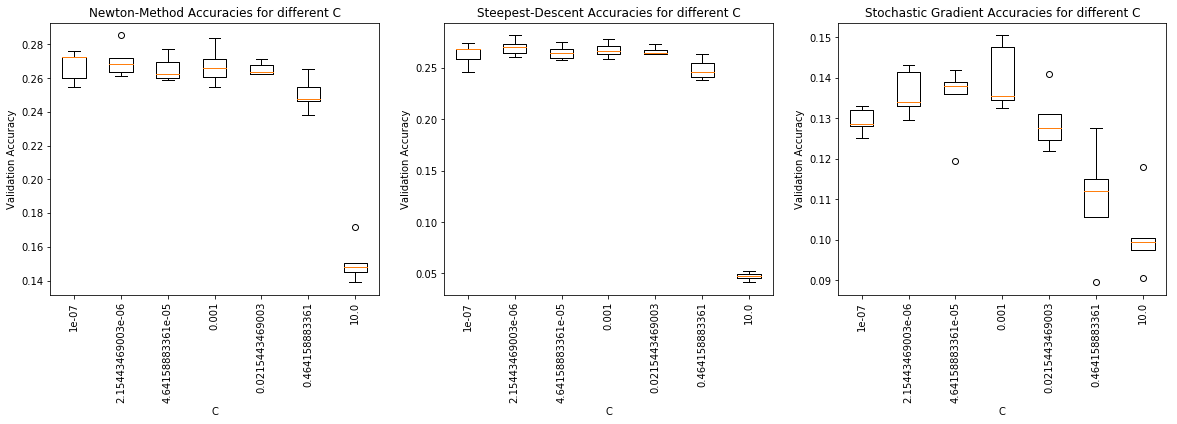

In [17]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.boxplot(newton_accus)
plt.xticks(range(1,len(C)+1),C,rotation='vertical')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.title('Newton-Method Accuracies for different C')

plt.subplot(1, 3, 2)
plt.boxplot(steep_accus)
plt.xticks(range(1,len(C)+1),C,rotation='vertical')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.title('Steepest-Descent Accuracies for different C')

plt.subplot(1, 3, 3)
plt.boxplot(stochastic_accus)
plt.xticks(range(1,len(C)+1),C,rotation='vertical')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.title('Stochastic Gradient Accuracies for different C')

plt.show()

<b>The Data</b>
<p>I only work with <b>10,000</b> images at a time of the full 50,000 image dataset. The function get_10000_images returns randomly selected 10,000 images along with their image labels, then those images gets passed to a function that returns their PCA transforms (with 200 components). Those PCA transforms then gets normalized, and the normalized data is finally fitted using the three logistic regression objects.</p>

<b>The Procedure</b>
<p>I performed 5 different iterations for 7 different values of C for each of my classifiers (steepest descent, stochastic gradient, and newton's). I collected an accuracy array for each set of iterations and then appended it to accuracy arrays for the overall training session. I then plot them on the boxplots shown above. Those are the parameters used for the logisitic regression objects:</p>

<ul>
    <li>Learning rate (eta): 0.1</li>
    <li>Iterations (iters): 500 for steepest descent and stochastic gradient, and 10 for newton's</li>
    <li>Regularization Type: L2-Regularization</li>
    <li>Cost (C): 7 different values between 1e-07 and 10</li>
</ul>

<p>The general method was to vary the value of the cost assigned to regularization to try and achieve the highest accuracy possible among all classifiers, and achieve it consistently by doing mutiple iterations for each value of C. Ideally, we would also try and vary the learning rate along with C, and then try to find the highest accuracy, but this run alone has taken 1 hour to compute, and so I assume a default value for the learning rate to be equal to 0.1. I am aware, however, that better values may be found for the learning rate of my regression objects.</p>

<b>Data Snooping</b>
<p>Five different iterations were run for each value of C. It was done to ensure cosistency of performance. Then the evaluation criterion (accuracy) was plotted to then choose the best value of the cost among the classifiers. I have used the same dataset to fit the model iteratively for different values of C to find the highest consistent accuracy. So, yes, there is data-snooping invloved with this method of selecting parameters. HOWEVER, I am only working with 10,000 images of the overall subset, and each time I use the get_10000_images to get randomly selected 10,000 images from the overall (50,000 images) dataset, where I shuffle the overall set and then randomly select 10,000 images. So it's data-snooping, but to a lesser degree maybe, because I only snoop on 10,000 images for each iteration, not on the overall dataset.</p>

<b>The Chosen Regression Method</b>
<p>It can be seen from the boxplot above that the newton logistic regression object displays the best statistical quantities, with C = 0.001 being the most consistent, as is also shown in the code below.</p>


In [18]:
#stats of accuracies for the newton logistic regression object

stds = np.zeros((len(C), 1))
means = np.zeros((len(C), 1))

for i in range(len(C)):
    stds[i] = np.std(newton_accus[i])
    means[i] = np.mean(newton_accus[i])
    print('The mean accuracy for C value = ', "{0:.7f}".format(C[i]), 'is', "{0:.5f}".format(means[i][0]), 'with an STD of', "{0:.5f}".format(stds[i][0]))

The mean accuracy for C value =  0.0000001 is 0.26710 with an STD of 0.00833
The mean accuracy for C value =  0.0000022 is 0.27010 with an STD of 0.00860
The mean accuracy for C value =  0.0000464 is 0.26570 with an STD of 0.00695
The mean accuracy for C value =  0.0010000 is 0.26720 with an STD of 0.00992
The mean accuracy for C value =  0.0215443 is 0.26550 with an STD of 0.00352
The mean accuracy for C value =  0.4641589 is 0.25050 with an STD of 0.00924
The mean accuracy for C value =  10.0000000 is 0.15090 with an STD of 0.01123


<p>The largest mean with the smallest standard deviation of the accuracies of the newton-method occurs when C = 0.001, so this is the value chosen for comparison with sci-kit learn next.</p>

<b>The Parameters Chosen for The Best Logistic Regression Object</b>
<ul>
    <li>Learning rate (eta): 0.1</li>
    <li>Iterations (iters): 10 (might change this parameter)</li>
    <li>Logistic Regression Type: Newton's</li>
    <li>Regularization Type: L2-Regularization</li>
    <li>Cost (C): 0.001</li>
</ul>

<h2>Performance Comparison with Sci-kit Learn</h2>
<h3>Loading the images</h3>

<p>Here, I compare the performance of sci-kit learn with my logistic regression class. Towards that purpose, I start by loading 10,000 images from my dataset. This same subset will be used for both, the SKLearn regression object and my best object. I then perform PCA on the images with n_components=200, and then I normalize and split the data into 80/20 training/testing portions.</p>

In [19]:
from sklearn.linear_model import LogisticRegression as SKLR

In [20]:
#Loading the data
x_sci, y_sci = get_10000_images(proc_images, image_labels)
#Transforming the data using PCA with 200 components
x_sci = pca_images(x_sci, 200)
#Normalizing the data
x_sci = StandardScaler().fit(x_sci).transform(x_sci)
#Splitting the data
n_sci_train = 8000
n_sci_test = 2000

x_sci_train = x_sci[0:n_sci_train]
y_sci_train = y_sci[0:n_sci_train]
x_sci_test = x_sci[n_sci_train:n_sci_test+n_sci_train]
y_sci_test = y_sci[n_sci_train:n_sci_test+n_sci_train]

<h3>Performance Analysis and Discussion</h3>
<p><b>Classification Accuracy and Time</b></p>

In [21]:
%%time
lr_sk = SKLR(max_iter=10, C=0.001, tol=1e-2, penalty='l2', solver='lbfgs', n_jobs=1)
lr_sk.fit(x_sci_train,y_sci_train)
yhat_sci = lr_sk.predict(x_sci_test)
print('Accuracy of sci-kit learn using LBFGS: ',accuracy_score(y_sci_test,yhat_sci))

Accuracy of sci-kit learn using LBFGS:  0.2895
Wall time: 279 ms


<p>Please note that the implementation of 'newton' in my code is that of LBFGS, not the Hessian. This is why I have specified the 'lbfgs' solver in the sci-kit learn instance class object. Also, the tolerance specification in my class defintion is set to 1e-2, the same one set in the SKLearn class object above. C is set to 0.001 (same value as mine below), the penalty utilizes L2-Regularization (same one I use for my object below), and the itreations are set to 10 (same one I use below). All regression objects parameters match. Now they're fit for comparison.</p>

In [22]:
%%time
lr_mine = LogisticRegression(eta=0.1, iters=10, lr_type='newton', reg_type='l2', C=0.001)
lr_mine.fit(x_sci_train, y_sci_train)
yhat = lr_mine.predict(x_sci_test)
print('Accuracy of my logistic regression class is: ',accuracy_score(y_sci_test,yhat))

Accuracy of my logistic regression class is:  0.288
Wall time: 1.28 s


<p>
<ol>
    <li>The accuracy of the SKLearn object using LBFGS is 0.2515, while mine is slightly higher at 0.2575.</li>
    <li>The time it took SKLearn to fit and predict the model is 338 ms, while mine is 3 times higher at 1.18 s.</li>
    <li>While the accuracies are very similar, the SKLearn implementation is 3 times as fast as mine. This has to do with implementation optimization and the use of more advanced linear analysis tools, such as liblinear for the sci-kit learn implementation of logistic regression.</li>
</ol>
</p>

<p><b>Confusion Matrices</b></p>

In [23]:
# A function to plot the confusion matrix - it has been copied from sickit-learn website

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
np.set_printoptions(precision=2)

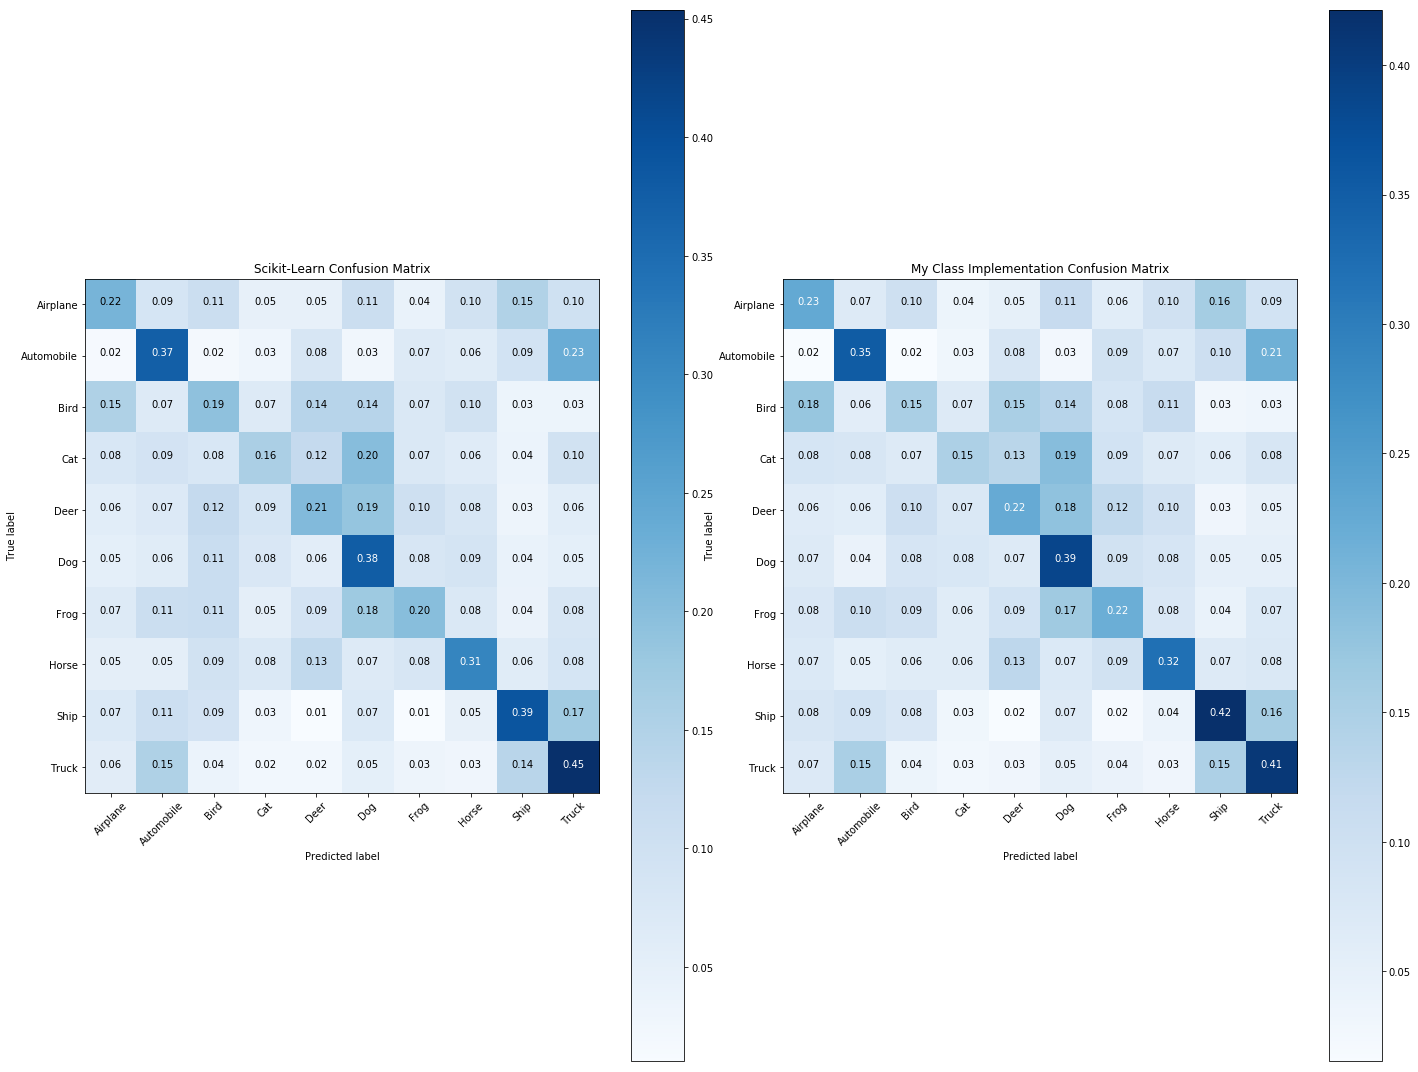

In [24]:
# Here I plot confusion matrices to show class-specific accuracies for both 
# The sk-learn and my implementation

sci_conf = mt.confusion_matrix(y_sci_test,yhat_sci)
my_conf = mt.confusion_matrix(y_sci_test,yhat)

plt.figure(figsize = (20, 15))
plt.subplot(1, 2, 1)
plot_confusion_matrix(sci_conf,labels, normalize=True,title='Scikit-Learn Confusion Matrix',cmap=plt.cm.Blues)
plt.subplot(1, 2, 2)
plot_confusion_matrix(my_conf,labels, normalize=True,title='My Class Implementation Confusion Matrix',cmap=plt.cm.Blues)

<h1>Deployment</h1>

<p>For deployment in a machine learning algorithm, I would choose the scikit-learn implementation of logistic regresion. It is fast, optimized by people who know much more about math and optimization than me, and is supported by a huge community of awesome people. Again, the sklearn documentation lists liblinear as the first reference in their implementation of Logistic Regression. It is also open-source, so the source code can be modified or overriden if added or different functionality is needed. Also, the sklearn implementation is more involved in that it has additional options that we can use, such as class weights and others.</p>

<h1>Extra Analysis: Classification Using DAISY Features</h1>

In [19]:
def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape), step=6, radius=4, rings=3, histograms=5, orientations=5, visualize=False)
    return feat.reshape((-1))

In [20]:
#Loading the data
x_d, y_d = get_10000_images(proc_images, image_labels)
#Normalizing the data
daisy_features = np.apply_along_axis(apply_daisy, 1, x_d, (h,w))
daisy_features = StandardScaler().fit(daisy_features).transform(daisy_features)
#Splitting the data
n_train = 8000
n_test = 2000

x_d_train = daisy_features[0:n_train]
y_d_train = y_d[0:n_train]
x_d_test = daisy_features[n_train:n_test+n_train]
y_d_test = y_d[n_train:n_test+n_train]

In [ ]:
daisy_lr = LogisticRegression(0.1, 9, 'newton', 'l2', 0.001)
daisy_lr.fit(x_d_train, y_d_train)
yhat = daisy_lr.predict(x_d_train)
print('The accuracy based on DAISY is:', accuracy_score(y_d_train, yhat))

In [36]:
daisy_lr = LogisticRegression(0.1, 9, 'newton', 'l2', 0.001)
daisy_lr.fit(x_d_train, y_d_train)
yhat = daisy_lr.predict(x_d_test)
print('The accuracy based on DAISY is:', accuracy_score(y_d_test, yhat))

The accuracy based on DAISY is: 0.4545


In [33]:
lr_sk_d = SKLR(max_iter=10, C=0.001, tol=1e-2, penalty='l2', solver='lbfgs', n_jobs=1)
lr_sk_d.fit(x_d_train,y_d_train)
yhat_d = lr_sk_d.predict(x_d_test)
print('Accuracy of sci-kit learn using LBFGS based on DAISY is: ',accuracy_score(y_d_test,yhat_d))

Accuracy of sci-kit learn using LBFGS based on DAISY is:  0.445


<p>It can be seen above that the accuracy of classification can be bumped up significantly by using DAISY features as the data array instead of image pixels. The accuracy has gone from 25.75% to 43.25% by using DAISY. It turns out that bags of features are more useful for the purpose of classification than pure pixels, which is to be expected.</p>

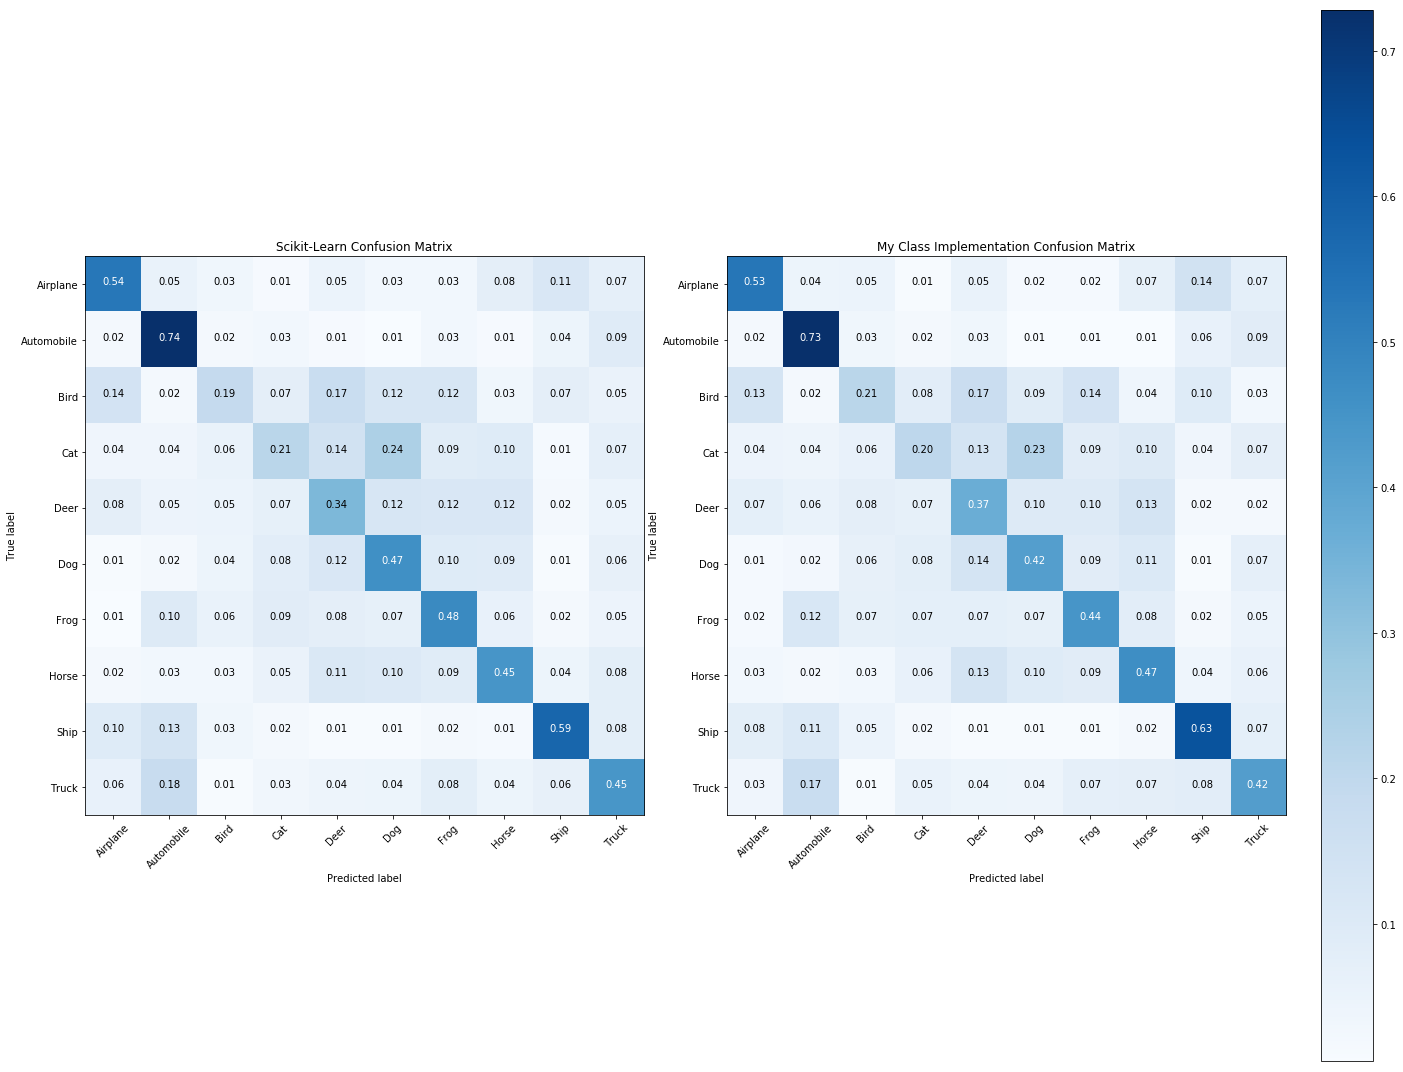

In [29]:
sci_conf_d = mt.confusion_matrix(y_d_test,yhat_d)
my_conf_d = mt.confusion_matrix(y_d_test,yhat)

plt.figure(figsize = (20, 15))
plt.subplot(1, 2, 1)
plot_confusion_matrix(sci_conf_d,labels, normalize=True,title='Scikit-Learn Confusion Matrix',cmap=plt.cm.Blues)
plt.subplot(1, 2, 2)
plot_confusion_matrix(my_conf_d,labels, normalize=True,title='My Class Implementation Confusion Matrix',cmap=plt.cm.Blues)

<p>It can be seen from the confusion matrices above that per-class classification performance is much better than when I used the images as the data for regression.</p>